In [1]:
import numpy as np
import pandas as pd 
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df, df_test = train_test_split(df)

X = df.iloc[:, 0:13]
X_test = df_test.iloc[:, 0:13]

Y = df['MEDV'] #TARGET：平均価格
Y_test = df_test['MEDV']

In [14]:
X.select_dtypes("float64").apply(pd.Series.nunique, axis = 0)

CRIM       378
ZN          25
INDUS       71
NOX         79
RM         347
AGE        291
DIS        307
TAX         62
PTRATIO     44
B          276
LSTAT      348
dtype: int64

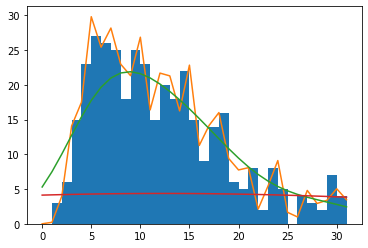

In [30]:
from scipy.stats import gaussian_kde

plt.hist(X["LSTAT"], bins=31, range=(0, 31))

# インスタンス作成
# ※ bw_methodは推定する時の幅になる
kde_005 = gaussian_kde(X["LSTAT"], bw_method=0.05)
kde_050 = gaussian_kde(X["LSTAT"], bw_method=0.50)
kde_500 = gaussian_kde(X["LSTAT"], bw_method=5.00)

# 指定した点で密度推定 
estimate_005 = kde_005(np.linspace(0, 31, num=32))
estimate_050 = kde_050(np.linspace(0, 31, num=32))
estimate_500 = kde_500(np.linspace(0, 31, num=32))

plt.plot(estimate_005 * 400)
plt.plot(estimate_050 * 400)
plt.plot(estimate_500 * 400)